In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\ads.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


## Data profiling and Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* The dataset has 200 entities/rows. However each columns has 200 not-null rows which means 0 rows are missing.

In [9]:

#This function highlight the minimum values for every columns
def highlight_min(s,props = ''):
    return np.where(s == np.nanmin(s.values), props,'')

df.describe().style.apply(highlight_min,props='color:Black;background-color:Grey')

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This summary shows the radio columns has minimum values of below zero(0).

So, on these columns, a value of Zero does not make sense and thus indicates missing value.



In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<b> Missing data Handling</b>

In [10]:
df_new = df
df_new[['radio']] = df_new[['radio']].replace(0,np.NaN)

In [11]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         1
newspaper     0
sales         0
dtype: int64

<Axes: >

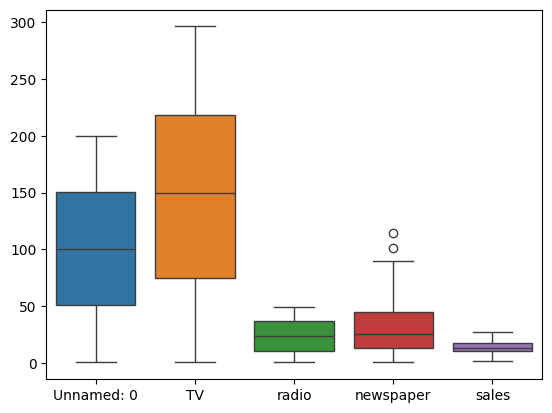

In [12]:
# To visulize the outlier
sns.boxplot(df)

In [13]:
df_new['radio'].fillna(df_new['radio'].mean(),inplace=True) 

In [14]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64